In [1]:
#References
# To plot error bar
# https://www.mathworks.com/help/matlab/ref/errorbar.html#bvdmeb0-1
# to save image
# https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
# to remvoe space in bar chart
# https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars
# to get x, y position for positioning bar values
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndenumerate.html
# https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html
# ternary operator
# https://www.geeksforgeeks.org/ternary-operator-in-python/
# xticks
# https://stackoverflow.com/questions/46231439/problems-with-matplotlib-pyplot-xticks
# https://www.mathworks.com/matlabcentral/answers/359237-how-do-i-label-each-bar-in-bar-group-with-a-string-on-top
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html
# https://stackoverflow.com/questions/48958208/how-do-you-change-the-default-font-color-for-all-text-in-matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/mouse_drug_data.csv"
clinical_trial_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/clinicaltrial_data.csv"

df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [3]:
df_drug_n_clinical_data = pd.merge(left=df_mouse_drug_data,right=df_clinical_trial_data
                                   ,how="inner", left_on="Mouse ID", right_on="Mouse ID")

In [4]:
tumor_vol_mean = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#https://www.geeksforgeeks.org/python-pandas-series-iteritems/
list_mean_tumor_vol = []
for items in tumor_vol_mean.iteritems(): 
    drug, timepoint = items[0]
    list_mean_tumor_vol.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })

In [5]:
#https://stackoverflow.com/questions/46129774/pandas-standard-error-calculation-issue
#mean_tumor = merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#standard_errors = [sem(s) for s in merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]]
tumor_vol_err = (df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]).sem()

list_err_tumor_vol = []
for items in tumor_vol_err.iteritems(): 
    drug, timepoint = items[0]
    list_err_tumor_vol.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })    

In [6]:
df_error_data = pd.DataFrame(list_err_tumor_vol)
df_main_data = pd.DataFrame(list_mean_tumor_vol)

In [7]:
df_main_data["Error"] = df_error_data["Tumor Volume (mm3)"].astype(float)
df_main_data.head(4)

,Drug,Timepoint,Tumor Volume (mm3),Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617


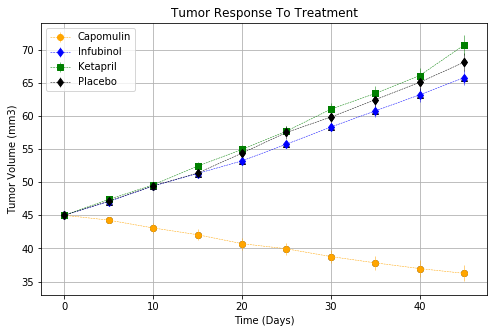

In [8]:
# https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle

#following is a line chart.. but we do not have to use that
# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Tumor Volume (mm3)"]],color='orange'
#          , marker='o', linestyle='dashed', linewidth=1, markersize=7, label="Capomulin")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Tumor Volume (mm3)"]],color='blue'
#          , marker='^', linestyle='dashed', linewidth=1, markersize=7, label="Infubinol")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Tumor Volume (mm3)"]],color='green'
#          , marker='s', linestyle='dashed', linewidth=1, markersize=7, label="Ketapril")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Placebo",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Placebo",["Tumor Volume (mm3)"]],color='black'
#          , marker='d', linestyle='dashed', linewidth=1, markersize=7, label="Placebo")


plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Tumor Volume (mm3)"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Tumor Volume (mm3)"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Tumor Volume (mm3)"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90 )
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Tumor Volume (mm3)"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90)

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Error"]].values
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5, label="Capomulin"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Error"]].values
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5, label="Infubinol"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Error"]].values
            , color='green', marker='s', linestyle='dashed', linewidth=0.5, label="Ketapril" 
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Error"]].values
            , color='black', marker='d', linestyle='dashed', linewidth=0.5, label="Placebo"
            )

plt.ylim(33, 74)

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.title("Tumor Response To Treatment")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/TumorResponseToTreatment.png')

In [9]:
metastatic_sites_mean = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
list_mean_metastatic_sites = []
for items in metastatic_sites_mean.iteritems(): 
    drug, timepoint = items[0]
    list_mean_metastatic_sites.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })

In [10]:
metastatic_sites_error = (df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]).sem()
list_error_metastatic_sites = []
for items in metastatic_sites_error.iteritems(): 
    drug, timepoint = items[0]
    list_error_metastatic_sites.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })

In [11]:
df_error_data = pd.DataFrame(list_error_metastatic_sites)
df_main_data = pd.DataFrame(list_mean_metastatic_sites)

In [12]:
df_main_data["Error"] = df_error_data["Metastatic Sites"].astype(float)
df_main_data.head(4)

,Drug,Metastatic Sites,Timepoint,Error
0,Capomulin,0.000,0,0.000000
1,Capomulin,0.160,5,0.074833
2,Capomulin,0.320,10,0.125433
3,Capomulin,0.375,15,0.132048


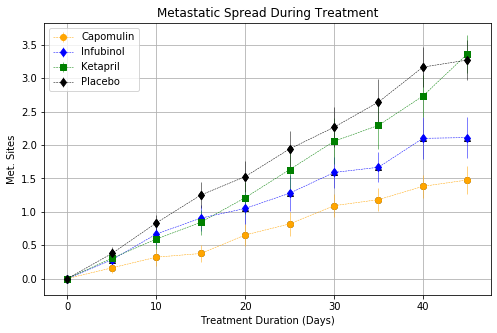

In [13]:

plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Metastatic Sites"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Metastatic Sites"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Metastatic Sites"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Metastatic Sites"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90)

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Error"]].values
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5, label="Capomulin"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Error"]].values
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5, label="Infubinol"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Error"]].values
            , color='green', marker='s', linestyle='dashed', linewidth=0.5, label="Ketapril" 
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Error"]].values
            , color='black', marker='d', linestyle='dashed', linewidth=0.5, label="Placebo"
            )

# plt.ylim(33, 74)

plt.grid()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/MetastaticSpreadDuringTreatment.png')

In [14]:
mice_counts = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

list_mice_counts = []
for items in mice_counts.iteritems(): 
    drug, timepoint = items[0]
    list_mice_counts.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Mice Counts": items[1]
        })

df_filtered_data = pd.DataFrame(list_mice_counts).loc[pd.DataFrame(list_mice_counts)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]

df_initial_count = df_filtered_data.loc[ df_filtered_data["Timepoint"]==0 , :]
df_main_data = pd.merge(left=df_filtered_data,right=df_initial_count,how="inner", left_on="Drug", right_on="Drug")
df_main_data["Counts%"] = (df_main_data["Mice Counts_x"] / df_main_data["Mice Counts_y"]) * 100
df_main_data.head(5)

,Drug,Mice Counts_x,Timepoint_x,Mice Counts_y,Timepoint_y,Counts%
0,Capomulin,25,0,25,0,100.0
1,Capomulin,25,5,25,0,100.0
2,Capomulin,25,10,25,0,100.0
3,Capomulin,24,15,25,0,96.0
4,Capomulin,23,20,25,0,92.0


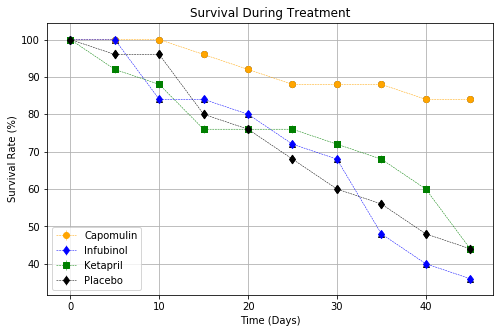

In [15]:

plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Counts%"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Counts%"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90)
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Counts%"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90 )
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Counts%"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90)

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Counts%"]].values
            , yerr=1
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5, label="Capomulin"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Counts%"]].values
            , yerr=1
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5, label="Infubinol"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Counts%"]].values
            , yerr=1
            , color='green', marker='s', linestyle='dashed', linewidth=0.5, label="Ketapril"
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Counts%"]].values
            , yerr=1
            , color='black', marker='d', linestyle='dashed', linewidth=0.5, label="Placebo"
            )

# plt.ylim(33, 74)

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.title("Survival During Treatment")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/SurvivalDuringTreatment.png')

In [16]:
df_main_data = pd.DataFrame(list_mean_tumor_vol)

df_data_at_0_time = df_main_data.loc[df_main_data["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & df_main_data["Timepoint"].isin([0]),:]
df_data_at_45_time = df_main_data.loc[df_main_data["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & df_main_data["Timepoint"].isin([45]),:]

df_main_data = pd.merge(left=df_data_at_0_time,right=df_data_at_45_time,how="inner", left_on="Drug", right_on="Drug")

df_main_data["Change%"] = (df_main_data["Tumor Volume (mm3)_y"]-df_main_data["Tumor Volume (mm3)_x"])/df_main_data["Tumor Volume (mm3)_x"] * 100
df_main_data

,Drug,Timepoint_x,Tumor Volume (mm3)_x,Timepoint_y,Tumor Volume (mm3)_y,Change%
0,Capomulin,0,45.0,45,36.236114,-19.475303
1,Infubinol,0,45.0,45,65.755562,46.123472
2,Ketapril,0,45.0,45,70.662958,57.028795
3,Placebo,0,45.0,45,68.084082,51.297960


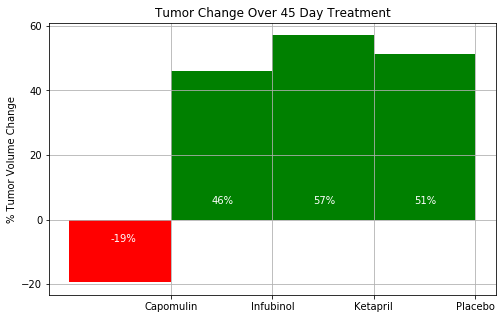

In [17]:
plt.figure(figsize=(8,5))

barElements = plt.bar(df_main_data["Drug"], df_main_data["Change%"],
        color=np.where(df_main_data["Change%"]>0, 'g', 'r'), align="edge", width=1)
locs, labels = plt.xticks()
plt.xticks(np.arange(1, 5, step=1), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.yticks(np.arange(-20, 79, step=20))
plt.rcParams['text.color'] = 'white'
for elem in barElements:
     x, y = (elem.xy)
     y = y-9.5 if elem.get_height() < 0 else y+2.5
     plt.text(x+0.4, y+2.5, str(int(round(elem.get_height())))+"%")
plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/TumorChangeOver45DayTreatment.png')


In [18]:
data = np.random.random((4, 4))
data

array([[0.01622666, 0.71542212, 0.29719815, 0.57492592],
       [0.29366724, 0.53147517, 0.81357604, 0.54457215],
       [0.83845217, 0.99534314, 0.86370061, 0.44164762],
       [0.08263377, 0.2999583 , 0.37960468, 0.01793129]])